In [156]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
universal_path="C:/Users/umber/Desktop/Assignment Data 2023-2024/"

In [157]:
player_valuations_df=pd.read_csv(universal_path+'player_valuations.csv')
game_events_df=pd.read_csv(universal_path+'game_events.csv')
games_df=pd.read_csv(universal_path+'games.csv')
players_df=pd.read_csv(universal_path+'players.csv')
game_lineups_df=pd.read_csv(universal_path+'game_lineups.csv')
competition_df=pd.read_csv(universal_path+'competitions.csv')

### seleziono solo le colonne necessarie e sostituisco le stringhe dei valori di mercato in varibili di tipo float

In [158]:
filtered_player=players_df[['player_id', 'name', 'last_season',
                  'market_value_in_eur', 'highest_market_value_in_eur',
                  'total_goals_in_career', 'total_goals_last_season', 'position','sub_position', 'date_of_birth','current_club_domestic_competition_id']]
filtered_player = filtered_player.dropna(subset=['market_value_in_eur'])

filtered_player['market_value_in_eur'] = filtered_player['market_value_in_eur'].str.replace('€', '')  
filtered_player['market_value_in_eur'] = filtered_player['market_value_in_eur'].str.replace('.', '')  
filtered_player['market_value_in_eur'] = filtered_player['market_value_in_eur'].str.replace(',', '.')  
filtered_player['market_value_in_eur'] = filtered_player['market_value_in_eur'].astype(float)

filtered_player['highest_market_value_in_eur'] = filtered_player['highest_market_value_in_eur'].str.replace('€', '')  
filtered_player['highest_market_value_in_eur'] = filtered_player['highest_market_value_in_eur'].str.replace('.', '')  
filtered_player['highest_market_value_in_eur'] = filtered_player['highest_market_value_in_eur'].str.replace(',', '.')  
filtered_player['highest_market_value_in_eur'] = filtered_player['highest_market_value_in_eur'].astype(float)
filtered_player

,player_id,name,last_season,market_value_in_eur,highest_market_value_in_eur,total_goals_in_career,total_goals_last_season,position,sub_position,date_of_birth,current_club_domestic_competition_id
7,4042,Brad Jones,2017,100000.0,2000000.0,1,0,Goalkeeper,Goalkeeper,1982-03-19,NL1
33,8187,Juanmi Callejón,2012,200000.0,1000000.0,0,0,Attack,Left Winger,1987-02-11,GR1
72,18922,Karim Benzema,2022,25000000.0,60000000.0,279,44,Attack,Centre-Forward,1987-12-19,ES1
89,22860,Jesper Hansen,2023,200000.0,1000000.0,2,1,Goalkeeper,Goalkeeper,1985-03-31,DK1
93,23365,Reginaldo,2012,10000.0,3500000.0,6,0,Attack,Centre-Forward,1983-07-31,IT1
...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Jaka Bijol,2023,10000000.0,10000000.0,11,2,Defender,Centre-Back,1999-02-05,IT1
30298,537171,Semuel Pizzignacco,2018,325000.0,350000.0,0,0,Goalkeeper,Goalkeeper,2001-09-01,IT1
30299,586756,Festy Ebosele,2023,4500000.0,4500000.0,0,0,Midfield,Right Midfield,2002-08-02,IT1
30300,704692,Nicolò Cocetta,2022,75000.0,75000.0,0,0,Defender,Centre-Back,2003-12-19,IT1


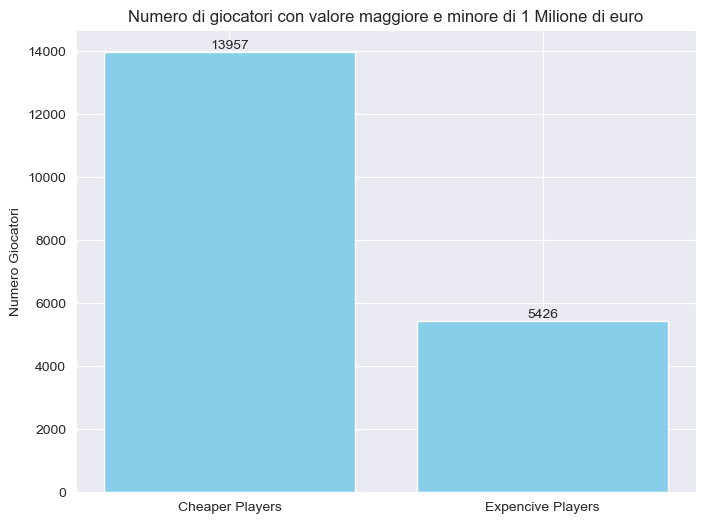

In [159]:
cheaper_players = filtered_player[filtered_player['market_value_in_eur']<1000000]
number_cheaper_players = len(cheaper_players)
expencive_players = filtered_player[filtered_player['market_value_in_eur']>=1000000]
number_expencive_players = len(expencive_players)
categories = ['Cheaper Players', 'Expencive Players']
data = [number_cheaper_players, number_expencive_players]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, data, color='skyblue')
plt.title('Numero di giocatori con valore maggiore e minore di 1 Milione di euro')
plt.ylabel('Numero Giocatori')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

plt.show()  

# confronto i giocatori economici e costosi in relazione al numero di goal segnati
## Cheaper Players:
### La maggior parte dei giocatori economici segna pochi o nessun goal. Solo un numero molto piccolo di giocatori economici riesce a segnarne più di 10, e il massimo numero di goal segnato da un giocatore economico è circa 23
## Expensive Players:
### I goal segnati dai giocatori costosi è molto più varia. C'è una presenza significativa di giocatori che segnano un numero elevato di goal, il che è coerente con l'aspettativa che i giocatori più costosi siano generalmente più performanti. Inoltre i giocatori costosi che hanno segnato piu di 10 goal sono molti


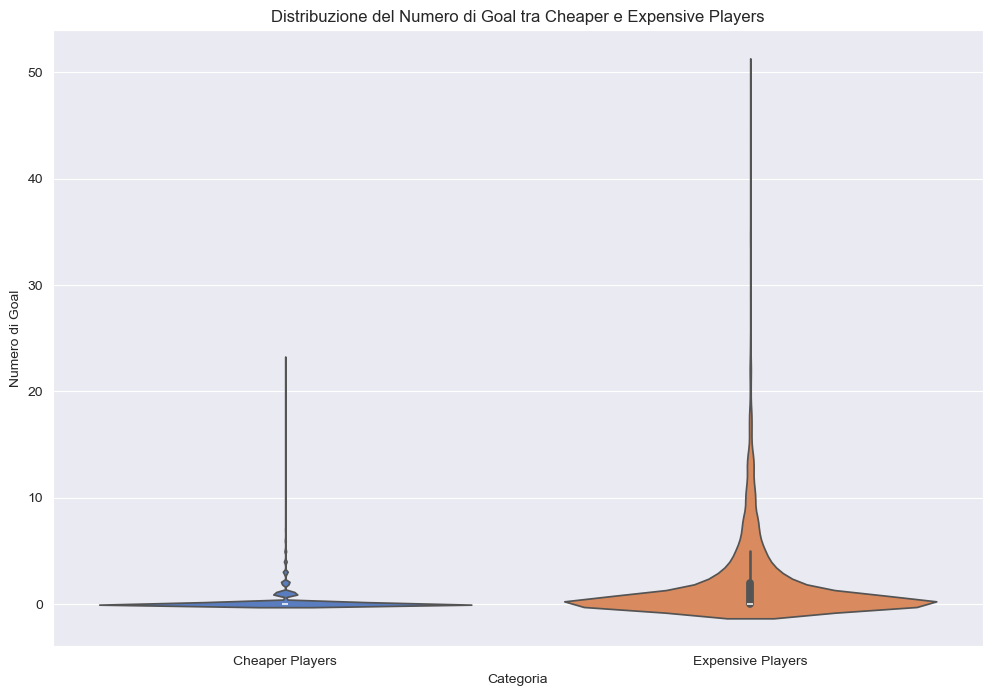

In [160]:
cheaper_players = filtered_player[filtered_player['market_value_in_eur'] < 1000000].copy()
expensive_players = filtered_player[filtered_player['market_value_in_eur'] >= 1000000].copy()

cheaper_players.loc[:, 'category'] = 'Cheaper Players'
expensive_players.loc[:, 'category'] = 'Expensive Players'

combined_df = pd.concat([cheaper_players, expensive_players])

plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='total_goals_last_season', hue='category', data=combined_df, palette='muted', legend=False)

plt.title('Distribuzione del Numero di Goal tra Cheaper e Expensive Players')
plt.xlabel('Categoria')
plt.ylabel('Numero di Goal')

plt.show()

Numero totale di goal fatti dai portieri: 296
Numero totale di goal fatti dai difensori: 17919
Numero totale di goal fatti dai centrocampisti: 34037
Numero totale di goal fatti dagli attaccanti: 75380
Numero totale di portieri: 2091
Numero totale di difensori: 6147
Numero totale di centrocampisti: 5606
Numero totale di attaccanti: 5524


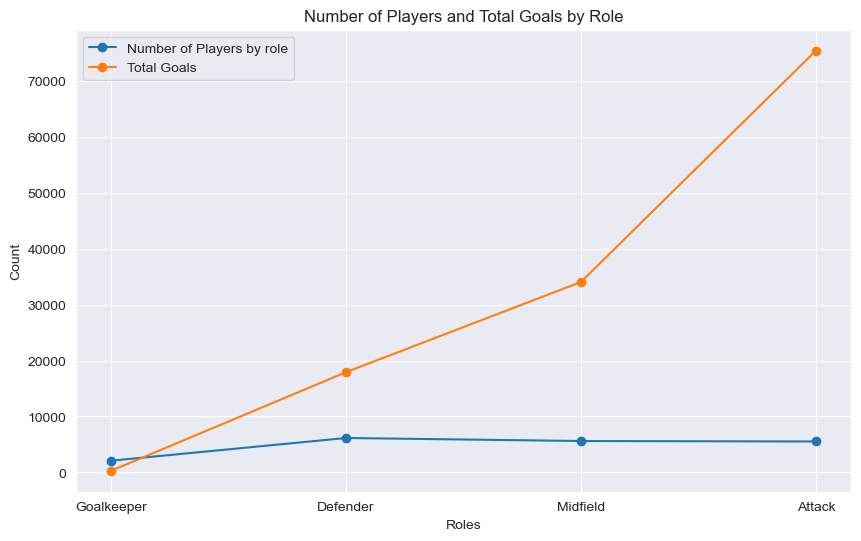

In [161]:
# Calcola il numero totale di giocatori e goal fatti per ogni ruolo

goalkeeper_df = filtered_player[filtered_player['position'] == 'Goalkeeper']
number_goalkeepers = len(goalkeeper_df)
total_goals_goalkeeper = goalkeeper_df['total_goals_in_career'].sum()

defenders_df = filtered_player[filtered_player['position'] == 'Defender']
number_defenders = len(defenders_df)
total_goals_defenders = defenders_df['total_goals_in_career'].sum()

midfielders_df = filtered_player[filtered_player['position'] == 'Midfield']
number_midfielders = len(midfielders_df)
total_goals_midfielders = midfielders_df['total_goals_in_career'].sum()

attackers_df = filtered_player[filtered_player['position'] == 'Attack']
number_attackers = len(attackers_df)
total_goals_attackers = attackers_df['total_goals_in_career'].sum()

print(f"Numero totale di goal fatti dai portieri: {total_goals_goalkeeper}")
print(f"Numero totale di goal fatti dai difensori: {total_goals_defenders}")
print(f"Numero totale di goal fatti dai centrocampisti: {total_goals_midfielders}")
print(f"Numero totale di goal fatti dagli attaccanti: {total_goals_attackers}")
print(f"Numero totale di portieri: {number_goalkeepers}")
print(f"Numero totale di difensori: {number_defenders}")
print(f"Numero totale di centrocampisti: {number_midfielders}")
print(f"Numero totale di attaccanti: {number_attackers}")
roles = ['Goalkeeper', 'Defender', 'Midfield', 'Attack']
number_of_players = [number_goalkeepers, number_defenders, number_midfielders, number_attackers]
total_goals = [total_goals_goalkeeper, total_goals_defenders, total_goals_midfielders, total_goals_attackers]

plt.figure(figsize=(10, 6))

plt.plot(roles, number_of_players, marker='o', label='Number of Players by role')
plt.plot(roles, total_goals, marker='o', label='Total Goals')

plt.xlabel('Roles')
plt.ylabel('Count')
plt.title('Number of Players and Total Goals by Role')
plt.legend()

plt.grid(True)
plt.show()

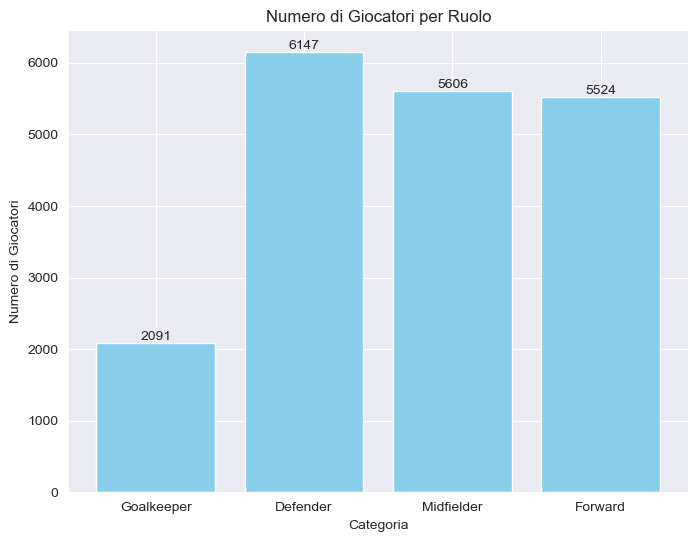

In [163]:
categories = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
total_player = [number_goalkeepers, number_defenders, number_midfielders, number_attackers]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, total_player, color='skyblue')

#aggiungo i valori alle colonne
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Numero di Giocatori per Ruolo')
plt.xlabel('Categoria')
plt.ylabel('Numero di Giocatori')
plt.show()

# analizzo il numero di giocatori per ruolo che ci sono in una squadra 
### creo un metodo per convertire sub_position in position

In [164]:
game_lineups_filtered=game_lineups_df[['club_id','game_id','player_id','position']]
game_events_filtered = game_events_df[['game_id', 'date']]

# Converti la colonna 'date' in formato datetime
game_events_filtered.loc[:, 'date'] = pd.to_datetime(game_events_filtered['date'])

# Converte start_date e end_date in formato datetime
start_date = pd.to_datetime('2022-08-01')
end_date = pd.to_datetime('2023-07-31')
game_events_filtered = game_events_filtered[(game_events_filtered['date'] >= start_date) & (game_events_filtered['date'] <= end_date)]

role_mapping = {
    'Goalkeeper': 'Goalkeeper',
    'Centre-Back': 'Defender',
    'Left-Back': 'Defender',
    'Right-Back': 'Defender',
    'Central Midfield': 'Midfield',
    'Defensive Midfield': 'Midfield',
    'Attacking Midfield': 'Midfield',
    'Left Winger': 'Attack',
    'Right Winger': 'Attack',
    'Centre-Forward': 'Attack',
}


game_lineups_filtered.loc[:, 'position'] = game_lineups_filtered['position'].map(role_mapping)
#game_lineups_filtered è un data frame che mi serve per analizzare il numero di giocatori di un ruolo che ci sono in una squadra
game_lineups_filtered

,club_id,game_id,player_id,position
0,338,3606208,419061,Attack
1,338,3606208,368611,Midfield
2,338,3606208,124182,Midfield
3,338,3606208,181118,Defender
4,338,3606208,404842,Defender
...,...,...,...,...
119128,46889,4228114,1200869,Defender
119129,46889,4228114,1203716,NaN
119130,46889,4228114,1200870,Goalkeeper
119131,46889,4228114,550816,Midfield


In [165]:
# Unisci i dataframe sulla base di game_id
merged_df = game_lineups_filtered.merge(game_events_filtered, on='game_id')
# Rimuovi i duplicati
merged_df = merged_df.drop_duplicates(subset=['club_id', 'game_id', 'player_id', 'position'])
#merged_df contiene anche la data per utilizzare solo i dati di una stagione in modo da escludere giocatori che hanno giocato in una squadra anni passati >> serve per ottenere la rosa completa di una squadra di un dreterminato anno
merged_df

,club_id,game_id,player_id,position,date
0,418,3998376,401530,Defender,2023-01-11 00:00:00
27,418,3998376,86202,Defender,2023-01-11 00:00:00
54,418,3998376,58884,Defender,2023-01-11 00:00:00
81,418,3998376,221316,Defender,2023-01-11 00:00:00
108,418,3998376,31909,Midfield,2023-01-11 00:00:00
...,...,...,...,...,...
166332,8024,4140355,392655,Attack,2023-07-30 00:00:00
166349,8024,4140355,282721,Midfield,2023-07-30 00:00:00
166366,8024,4140355,534528,Attack,2023-07-30 00:00:00
166383,8024,4140355,527304,Midfield,2023-07-30 00:00:00


In [166]:
print("DataFrame unito:\n", merged_df)

# Raggruppa per club e posizione e conta i giocatori per ogni ruolo
position_counts = merged_df.groupby(['club_id', 'position']).size().unstack(fill_value=0)

position_counts = position_counts.reindex(columns=['Goalkeeper', 'Defender', 'Midfield', 'Attack'], fill_value=0)

print("Conteggi delle posizioni per club:\n", position_counts)

# Calcola la media dei ruoli per tutte le squadre
average_positions = position_counts.mean(axis=0)

print("Medie delle posizioni per tutte le squadre:\n", average_positions)

DataFrame unito:
         club_id  game_id  player_id  position                 date
0           418  3998376     401530  Defender  2023-01-11 00:00:00
27          418  3998376      86202  Defender  2023-01-11 00:00:00
54          418  3998376      58884  Defender  2023-01-11 00:00:00
81          418  3998376     221316  Defender  2023-01-11 00:00:00
108         418  3998376      31909  Midfield  2023-01-11 00:00:00
...         ...      ...        ...       ...                  ...
166332     8024  4140355     392655    Attack  2023-07-30 00:00:00
166349     8024  4140355     282721  Midfield  2023-07-30 00:00:00
166366     8024  4140355     534528    Attack  2023-07-30 00:00:00
166383     8024  4140355     527304  Midfield  2023-07-30 00:00:00
166400     8024  4140355     343289    Attack  2023-07-30 00:00:00

[10076 rows x 5 columns]
Conteggi delle posizioni per club:
 position  Goalkeeper  Defender  Midfield  Attack
club_id                                         
14                

# analisi sui giocatori costosi
### il primo dato che stupisce, tra i giocatori che valgono piu di 30 Milioni di euro, il numero di attaccanti e di centrocampisti è uguale

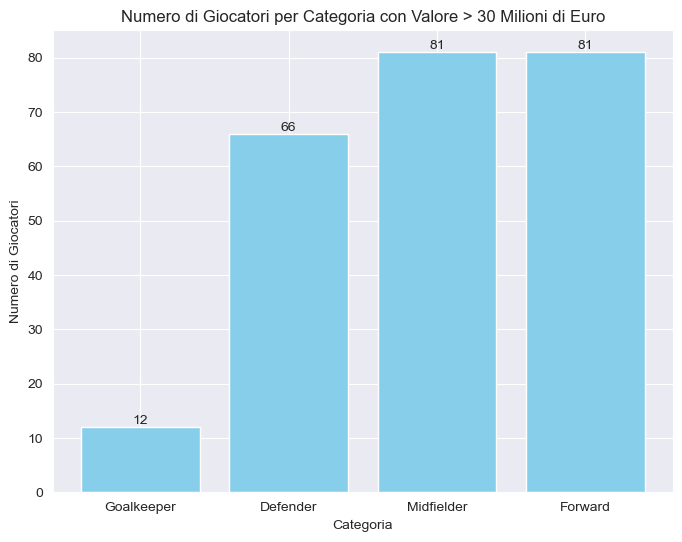

In [167]:
# Filtra i giocatori con valore di mercato maggiore di 50 milioni di euro
high_value_players = filtered_player[filtered_player['market_value_in_eur'] > 30000000]

# Conta il numero di giocatori in ciascuna categoria
number_goalkeepers = len(high_value_players[high_value_players['position'] == 'Goalkeeper'])
number_defenders = len(high_value_players[high_value_players['position'] == 'Defender'])
number_midfielders = len(high_value_players[high_value_players['position'] == 'Midfield'])
number_attackers = len(high_value_players[high_value_players['position'] == 'Attack'])

categories = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
total_player = [number_goalkeepers, number_defenders, number_midfielders, number_attackers]

# Creazione del barplot con matplotlib
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, total_player, color='skyblue')
plt.title('Numero di Giocatori per Categoria con Valore > 30 Milioni di Euro')
plt.xlabel('Categoria')
plt.ylabel('Numero di Giocatori')

# Aggiungi i valori sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

plt.show()

### nonostante la maggior parte del numero dei gol è segnato dagli attacanti, questo è la prova che il numero dei goal non è l'unica variabile che determina il valore dei giocatori.
### 

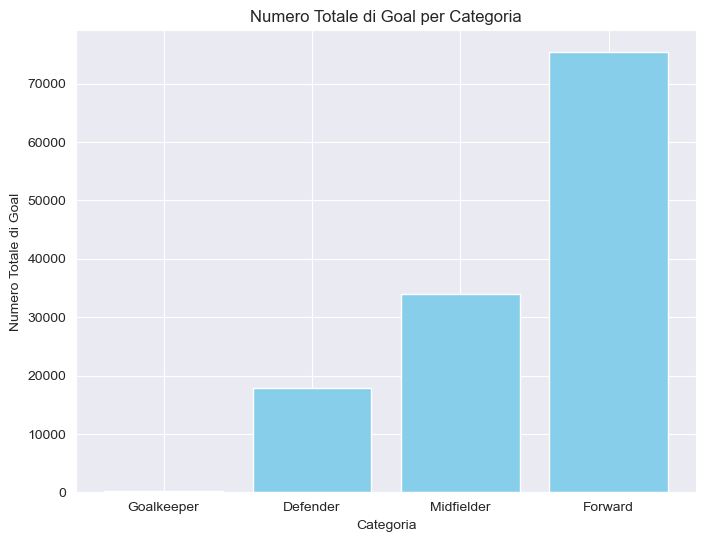

In [168]:
categories = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
total_goals = [total_goals_goalkeeper, total_goals_defenders, total_goals_midfielders, total_goals_attackers]

# Creazione del barplot con matplotlib
plt.figure(figsize=(8, 6))
plt.bar(categories, total_goals, color='skyblue')
plt.title('Numero Totale di Goal per Categoria')
plt.xlabel('Categoria')
plt.ylabel('Numero Totale di Goal')
plt.show()

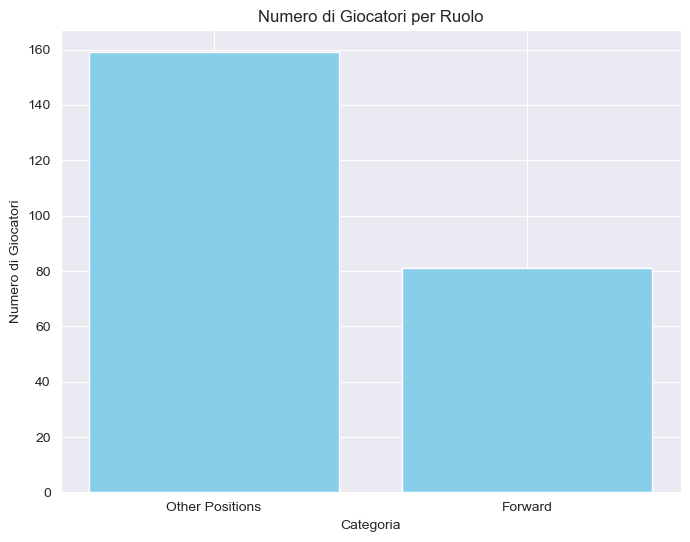

In [169]:
categories = ['Other Positions', 'Forward']
total_player = [number_goalkeepers+number_defenders+number_midfielders, number_attackers]

# Creazione del barplot con matplotlib
plt.figure(figsize=(8, 6))
plt.bar(categories, total_player, color='skyblue')
plt.title('Numero di Giocatori per Ruolo')
plt.xlabel('Categoria')
plt.ylabel('Numero di Giocatori')
plt.show()

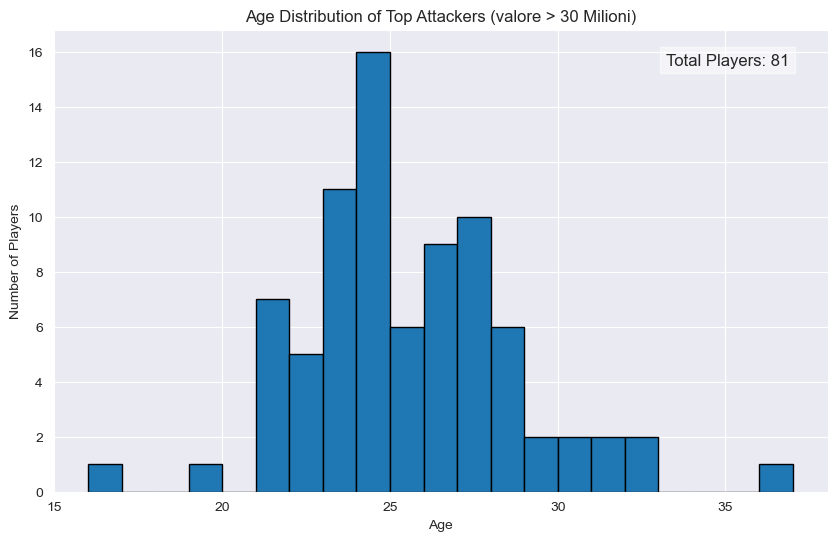

In [170]:
# Filtra i dati
df_subset = filtered_player[(filtered_player['position'] == 'Attack') & 
                            (filtered_player['market_value_in_eur'] > 30000000)].copy()

# Calcola l'età dei giocatori
current_date = pd.to_datetime('today')
df_subset.loc[:, 'date_of_birth'] = pd.to_datetime(df_subset['date_of_birth'])
df_subset.loc[:, 'age'] = df_subset['date_of_birth'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))

# Crea un grafico che mostra l'età dei giocatori
plt.figure(figsize=(10, 6))
plt.hist(df_subset['age'], bins=range(df_subset['age'].min(), df_subset['age'].max() + 1), edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Age Distribution of Top Attackers (valore > 30 Milioni)')
plt.grid(True)

# Aggiungi il numero totale di giocatori in alto a destra
plt.text(0.95, 0.95, f'Total Players: {df_subset.__len__()}', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


plt.show()

### correlazione tra goal segnati e valore di mercato tra i giocatori che valgono più di 20 milioni di euro 


In [171]:
df_subset = filtered_player[(filtered_player['position'] == 'Attack') & 
                                 (filtered_player['market_value_in_eur'] > 3000000)]


# Calcola la regressione lineare con NumPy
goals = df_subset['total_goals_last_season']
market_value = df_subset['market_value_in_eur']
slope, intercept = np.polyfit(goals, market_value, 1)

# Crea il DataFrame per la linea di tendenza
trendline_df = pd.DataFrame({
    'goals': [goals.min(), goals.max()],
    'trendline': [slope * goals.min() + intercept, slope * goals.max() + intercept]
})

# Crea il grafico a dispersione con Altair
scatter_plot = alt.Chart(df_subset).mark_circle().encode(
    x='total_goals_last_season:Q',
    y='market_value_in_eur:Q',
    tooltip=['name', 'date_of_birth']
).properties(
    title='Correlazione tra Valore di Mercato e Numero di Goal (attaccanti con Valore > 3 Milioni)',
    width=600,
    height=400
)

# Aggiungi la linea di tendenza
trendline = alt.Chart(trendline_df).mark_line(color='red').encode(
    x='goals:Q',
    y='trendline:Q'
)

# Componi il grafico finale
final_chart = (scatter_plot + trendline)

# Mostra il grafico interattivo
final_chart.interactive()

C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert

alt.LayerChart(...)

### L'età influisce significativamente sul valore di mercato dei top giocatori. Se escludiamo i giocatori over 25, la retta di trend mostra una maggiore inclinazione, indicando che il valore di mercato dei giocatori giovani dipende fortemente dal numero di goal segnati. Invece, per i giocatori a fine carriera, il valore di mercato tende a essere più basso, anche se segnano molti goal. Questo fenomeno evidenzia come il potenziale futuro e la longevità della carriera influenzino il valore di mercato più delle prestazioni attuali per i giocatori giovani.

In [172]:
df_subset = filtered_player[(filtered_player['position'] == 'Attack') & 
                            (filtered_player['market_value_in_eur'] > 3000000) &
                            (filtered_player['date_of_birth'] > '1998-01-01')]

# Calcola la regressione lineare con NumPy
goals = df_subset['total_goals_last_season']
market_value = df_subset['market_value_in_eur']
slope, intercept = np.polyfit(goals, market_value, 1)

# Crea il DataFrame per la linea di tendenza
trendline_df = pd.DataFrame({
    'goals': [goals.min(), goals.max()],
    'trendline': [slope * goals.min() + intercept, slope * goals.max() + intercept]
})

# Crea il grafico a dispersione con Altair
scatter_plot = alt.Chart(df_subset).mark_circle().encode(
    x='total_goals_last_season:Q',
    y='market_value_in_eur:Q',
    tooltip=['name','date_of_birth']
).properties(
    title='Correlazione tra Valore di Mercato e Numero di Goal (Giocatori con Posizione = Attack e Valore > 3 Milioni e Età < 26 anni)',
    width=600,
    height=400
)

# Aggiungi la linea di tendenza
trendline = alt.Chart(trendline_df).mark_line(color='red').encode(
    x='goals:Q',
    y='trendline:Q'
)

# Componi il grafico finale
final_chart = (scatter_plot + trendline)

# Mostra il grafico interattivo
final_chart.interactive()

C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert

alt.LayerChart(...)

### un evento che ha segnato notevolmente il valore dei giocatori è stato il covid 19

Text(0.5, 1.0, "media valore dei giocatori in correlazione all'anno")

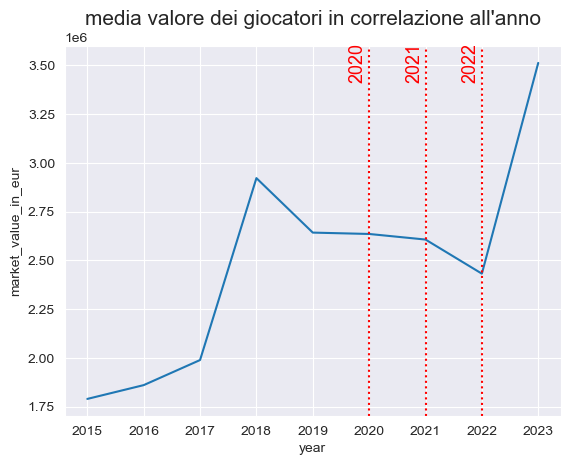

In [173]:
from matplotlib import ticker

player_valuations_df['date']=pd.to_datetime(player_valuations_df['date'])
player_valuations_df['year'] = player_valuations_df['date'].dt.year
filtered_player_valuations=player_valuations_df[player_valuations_df['year']>=2015]
avg_player_valuations=filtered_player_valuations.groupby('year')['market_value_in_eur'].mean().reset_index()
sns.lineplot(data=avg_player_valuations,x='year', y = 'market_value_in_eur')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
covid_years = [2020, 2021, 2022]
for year in covid_years:
    plt.axvline(x=year, color='red', linestyle=':')
    plt.text(year-0.2, avg_player_valuations['market_value_in_eur'].max(), str(year), color='red', ha='center',va='center',rotation=90, fontsize=13)

plt.title('media valore dei giocatori in correlazione all\'anno', fontsize=15)

### il mondo del calcio è un modo ricchissimo, che ovviamente dipende dal numero di persone che lo guardano

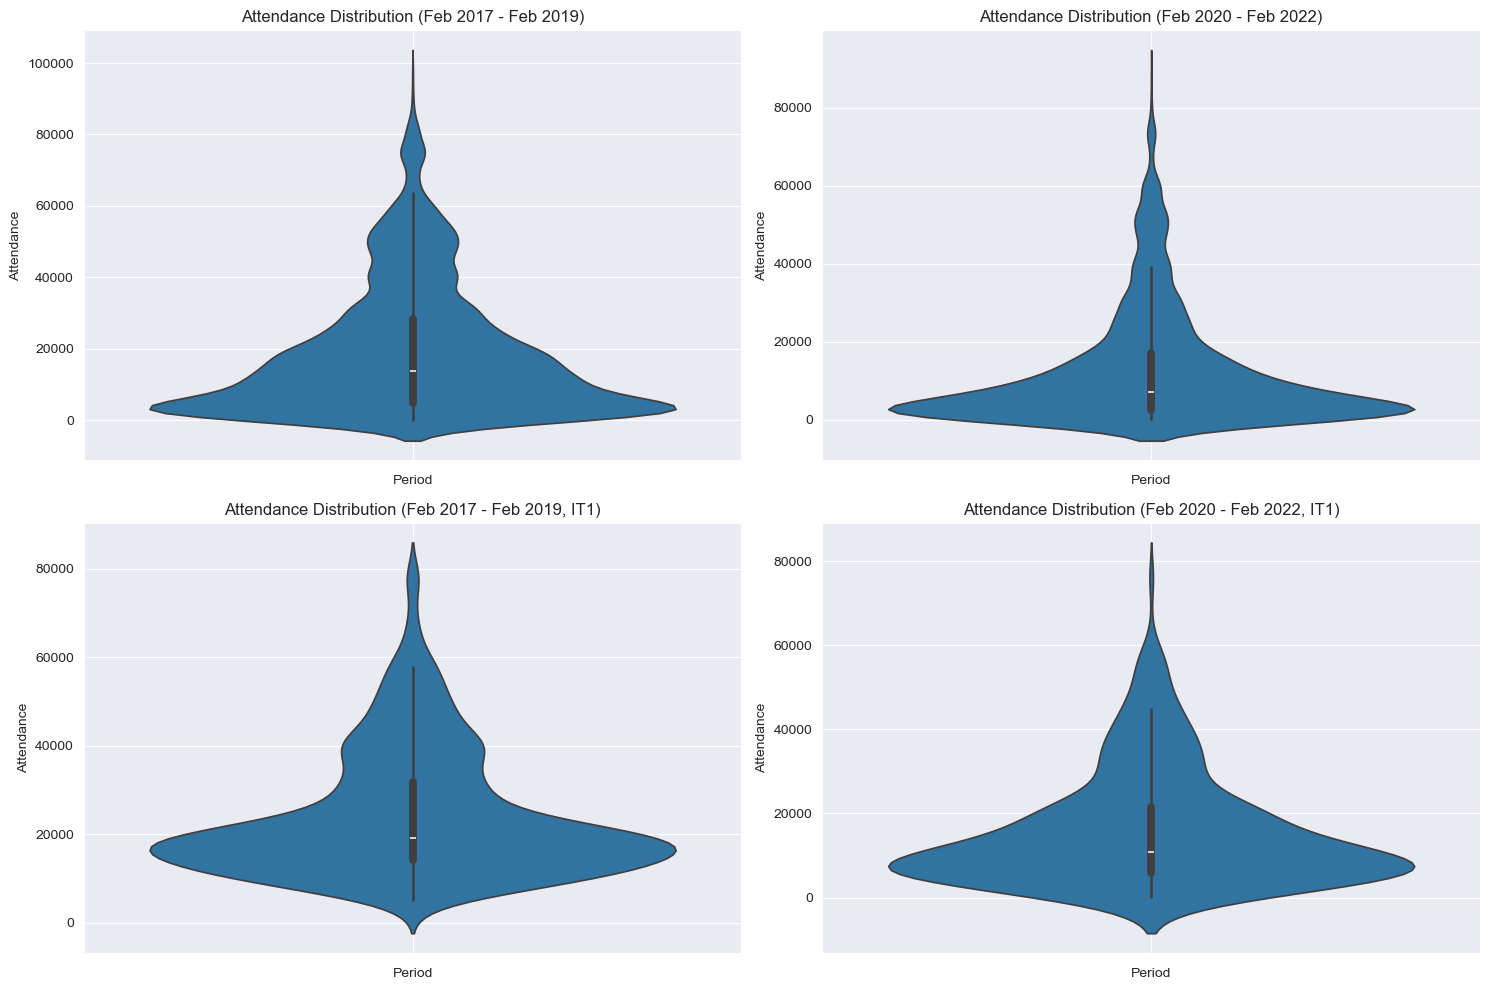

In [175]:
# Filtra le sole colonne game_id e attendance
filtered_games_df = games_df[['game_id', 'attendance','date', 'competition_id']]

period1_start = '2017-02-01'
period1_end = '2019-02-28'
period2_start = '2020-02-01'
period2_end = '2022-02-28'

filtered_df_period1 = filtered_games_df[(filtered_games_df['date'] >= period1_start) & (filtered_games_df['date'] <= period1_end)]
filtered_df_period2 = filtered_games_df[(filtered_games_df['date'] >= period2_start) & (filtered_games_df['date'] <= period2_end)]

filtered_df_period1_it1 = filtered_df_period1[filtered_df_period1['competition_id'] == 'IT1']
filtered_df_period2_it1 = filtered_df_period2[filtered_df_period2['competition_id'] == 'IT1']

# Creazione del grafico
plt.figure(figsize=(15, 10))

# Primo violin plot: Feb 2017 - Feb 2019
plt.subplot(2, 2, 1)
sns.violinplot(y='attendance', data=filtered_df_period1)
plt.title('Attendance Distribution (Feb 2017 - Feb 2019)')
plt.xlabel('Period')
plt.ylabel('Attendance')
plt.grid(True)

# Secondo violin plot: Feb 2020 - Feb 2022
plt.subplot(2, 2, 2)
sns.violinplot(y='attendance', data=filtered_df_period2)
plt.title('Attendance Distribution (Feb 2020 - Feb 2022)')
plt.xlabel('Period')
plt.ylabel('Attendance')
plt.grid(True)

# Terzo violin plot: Feb 2017 - Feb 2019, competition_id 'IT1'
plt.subplot(2, 2, 3)
sns.violinplot(y='attendance', data=filtered_df_period1_it1)
plt.title('Attendance Distribution (Feb 2017 - Feb 2019, IT1)')
plt.xlabel('Period')
plt.ylabel('Attendance')
plt.grid(True)

# Quarto violin plot: Feb 2020 - Feb 2022, competition_id 'IT1'
plt.subplot(2, 2, 4)
sns.violinplot(y='attendance', data=filtered_df_period2_it1)
plt.title('Attendance Distribution (Feb 2020 - Feb 2022, IT1)')
plt.xlabel('Period')
plt.ylabel('Attendance')
plt.grid(True)

# Mostra il grafico
plt.tight_layout()
plt.show()

In [176]:
filtered_competition_df = competition_df[['competition_id', 'competition_code']]
#mi serve per fare un join con la tabella games in modo da conoscere il nome della competizione e mostrarlo nel grafico
filtered_competition_df

,competition_id,competition_code
0,CIT,italy-cup
1,NLSC,johan-cruijff-schaal
2,GRP,kypello-elladas
3,POSU,supertaca-candido-de-oliveira
4,RUSS,russian-super-cup
5,SUC,supercopa
6,USC,uefa-super-cup
7,DK1,superligaen
8,EL,europa-league
9,ES1,laliga


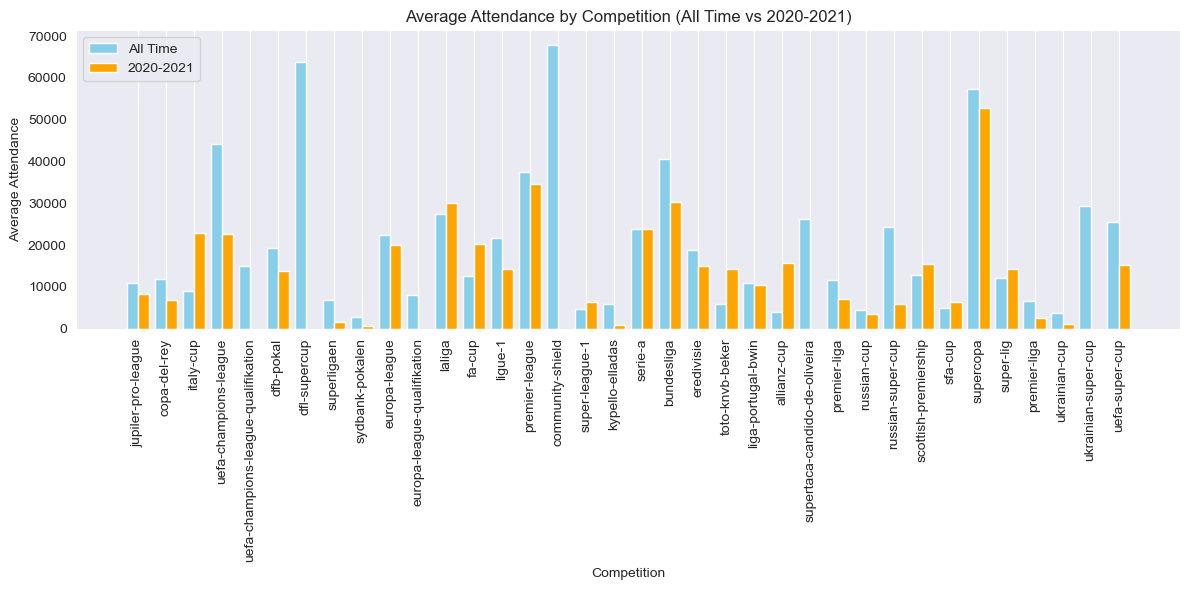

In [178]:
# Filtra i dati per l'anno solare 2020-2021
start_date = '2020-01-01'
end_date = '2021-01-01'
filtered_df_2020 = filtered_games_df[(filtered_games_df['date'] >= start_date) & (filtered_games_df['date'] <= end_date)]

# Calcola la media delle presenze per ciascuna competizione
average_attendance_by_competition_2020 = filtered_df_2020.groupby('competition_id')['attendance'].mean().reset_index()
average_attendance_by_competition = filtered_games_df.groupby('competition_id')['attendance'].mean().reset_index()

# Unisci i due DataFrame per avere tutte le competizioni presenti in entrambi i periodi
merged_df = pd.merge(average_attendance_by_competition, average_attendance_by_competition_2020, on='competition_id', suffixes=('_all_time', '_2020'))

# Unisci con il DataFrame competition_df per ottenere i nomi delle competizioni
merged_df = pd.merge(merged_df, competition_df, on='competition_id')

plt.figure(figsize=(12, 6))

bar_width = 0.4
index = np.arange(len(merged_df))

plt.bar(index, merged_df['attendance_all_time'], bar_width, label='All Time', color='skyblue')

plt.bar(index + bar_width, merged_df['attendance_2020'], bar_width, label='2020-2021', color='orange')

plt.xlabel('Competition')
plt.ylabel('Average Attendance')
plt.title('Average Attendance by Competition (All Time vs 2020-2021)')
plt.xticks(index + bar_width / 2, merged_df['competition_code'], rotation=90)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()